# 加载google drive和代码文件


In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# 在此处填写代码文件所在Google drive的位置
# GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = '2020FA/A2'
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'EECS/H!'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['__pycache__', 'three_layer_net.ipynb', 'three_layer_net.py']


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import statistics
import random
import time
%matplotlib inline


plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['font.size'] = 16
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [ ]:
if torch.cuda.is_available:
  print('Good to go!')
else:
  print('Please set GPU via Edit -> Notebook Settings.')

Good to go!


In [ ]:
import sys
sys.path.append(GOOGLE_DRIVE_PATH)

import time, os
os.environ["TZ"] = "US/Eastern"
time.tzset()

from three_layer_net import hello_three_layer_net
hello_three_layer_net()


three_layer_net_path = os.path.join(GOOGLE_DRIVE_PATH, 'three_layer_net.py')
three_layer_net_edit_time = time.ctime(os.path.getmtime(three_layer_net_path))
print('two_layer_net.py last edited on %s' % three_layer_net_edit_time)

Hello from two_layer_net.py!
two_layer_net.py last edited on Tue Apr 30 06:58:54 2024


# 加载数据集

In [ ]:
!git clone https://github.com/zalandoresearch/fashion-mnist.git
import sys
sys.path.insert(0, '/content/fashion-mnist/utils')
import mnist_reader
X_train, y_train = mnist_reader.load_mnist('/content/fashion-mnist/data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('/content/fashion-mnist/data/fashion', kind='t10k')
#X_train, y_train, X_test, y_test = torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.int64), torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.int64)  # 可以指定 dtype
if torch.cuda.is_available():
    X_train, y_train, X_test, y_test = X_train.to('cuda'), y_train.to('cuda'), X_test.to('cuda'), y_test.to('cuda')

print('train data shapes:', X_train.shape)
print('train labels shape', y_train.shape)
print('test data shapes:', X_test.shape)
print('test labels shape', y_test.shape)

fatal: destination path 'fashion-mnist' already exists and is not an empty directory.
train data shapes: (60000, 784)
train labels shape (60000,)
test data shapes: (10000, 784)
test labels shape (10000,)


# 训练神经网络

In [ ]:
from three_layer_net import ThreeLayerNet

input_size = 784
hidden_size1 = 128
hidden_size2 = 36
num_classes = 10

# fix random seed before we generate a set of parameters

net = ThreeLayerNet(input_size, hidden_size1, hidden_size2, num_classes, dtype=X_train.dtype, )

# Train the network
stats = net.train(X_train, y_train,

                  num_iters=500, batch_size=1000,
                  learning_rate=1, learning_rate_decay=0.95,
                  reg=0, verbose=True)

# Predict on the validation set
y_val_pred = net.predict(X_train)
val_acc = 100.0 * np.mean(y_val_pred == y_train)
print('Validation accuracy: {:.2f}%'.format(val_acc))

iteration 0 / 500: loss 2.326
iteration 100 / 500: loss 2.304
iteration 200 / 500: loss 2.303
iteration 300 / 500: loss 2.302
iteration 400 / 500: loss 2.303
Validation accuracy: 10.00%


# 参数优化

train with hidden size1: 128
train with hidden size1: 256


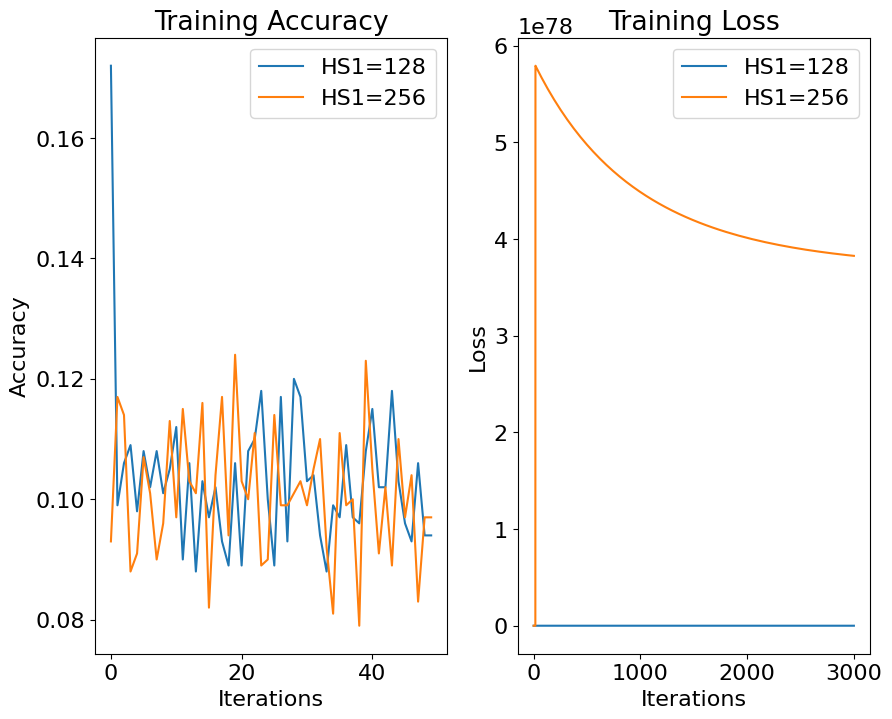

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from three_layer_net import ThreeLayerNet
hidden_sizes1 = [128,256]
h2 = 36
lr = 0.1
reg = 0.001

stat_dict = {}
for hs1 in hidden_sizes1:
    print('train with hidden size1: {}'.format(hs1))
    # 设置随机数种子
    np.random.seed(0)
    net = ThreeLayerNet(input_size, hs1, h2, num_classes, dtype=X_train.dtype)
    stats = net.train(X_train, y_train,
            num_iters=3000, batch_size=1000,
            learning_rate=lr, learning_rate_decay=0.95,
            reg=reg, verbose=False)
    stat_dict[hs1] = stats

# 创建一个宽10英寸、高8英寸的图形窗口
plt.figure(figsize=(10, 8))

# 遍历每个隐藏层大小的统计数据，并绘制训练精度和损失
for hs1, stats in stat_dict.items():
    train_acc_history = stats['train_acc_history']  # 提取训练精度历史
    loss_history = stats['loss_history']  # 提取损失历史

    # 生成迭代次数列表
    iterations = list(range(len(train_acc_history)))

    # 绘制训练精度图
    plt.subplot(1, 2, 1)  # 1行2列的第1个
    plt.plot(iterations, train_acc_history, label=f'HS1={hs1}')
    plt.title('Training Accuracy')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')

    # 绘制损失图
    plt.subplot(1, 2, 2)  # 1行2列的第2个
    plt.plot(loss_history, label=f'HS1={hs1}')
    plt.title('Training Loss')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')

# 在第一个图（准确率）上添加图例
plt.subplot(1, 2, 1)
plt.legend()

# 在第二个图（损失）上添加图例
plt.subplot(1, 2, 2)
plt.legend()

# 显示整个图形
plt.show()


train with hidden size2: 20
train with hidden size2: 36
train with hidden size2: 78


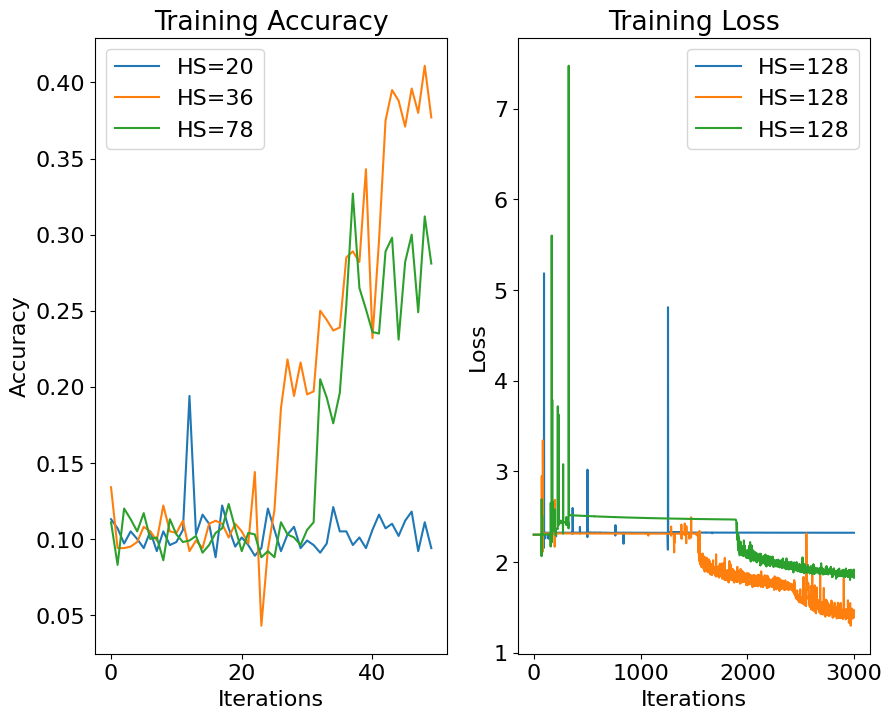

In [ ]:
import numpy as np
from three_layer_net import ThreeLayerNet

hs1 = 128
hidden_sizes2 = [20 ,36, 78]
lr = 0.1
reg = 0.001

stat_dict = {}
for hs2 in hidden_sizes2:
    print('train with hidden size2: {}'.format(hs2))
    # 设置随机数种子
    np.random.seed(0)
    net = ThreeLayerNet(input_size, hs1, hs2, num_classes, dtype=X_train.dtype)
    stats = net.train(X_train, y_train,
            num_iters=3000, batch_size=1000,
            learning_rate=lr, learning_rate_decay=0.95,
            reg=reg, verbose=False)
    stat_dict[hs2] = stats

# 创建一个宽10英寸、高8英寸的图形窗口
plt.figure(figsize=(10, 8))

# 遍历每个隐藏层大小的统计数据，并绘制训练精度和损失
for hs2, stats in stat_dict.items():
    train_acc_history = stats['train_acc_history']  # 提取训练精度历史
    loss_history = stats['loss_history']  # 提取损失历史

    # 生成迭代次数列表
    iterations = list(range(len(train_acc_history)))

    # 绘制训练精度图
    plt.subplot(1, 2, 1)  # 1行2列的第1个
    plt.plot(iterations, train_acc_history, label=f'HS2={hs2}')
    plt.title('Training Accuracy')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')

    # 绘制损失图
    plt.subplot(1, 2, 2)  # 1行2列的第2个
    plt.plot(loss_history, label=f'HS2={hs2}')
    plt.title('Training Loss')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')

# 在第一个图（准确率）上添加图例
plt.subplot(1, 2, 1)
plt.legend()

# 在第二个图（损失）上添加图例
plt.subplot(1, 2, 2)
plt.legend()

# 显示整个图形
plt.show()


train with lr: 0.0001
train with lr: 0.01
train with lr: 1.0
train with lr: 100.0


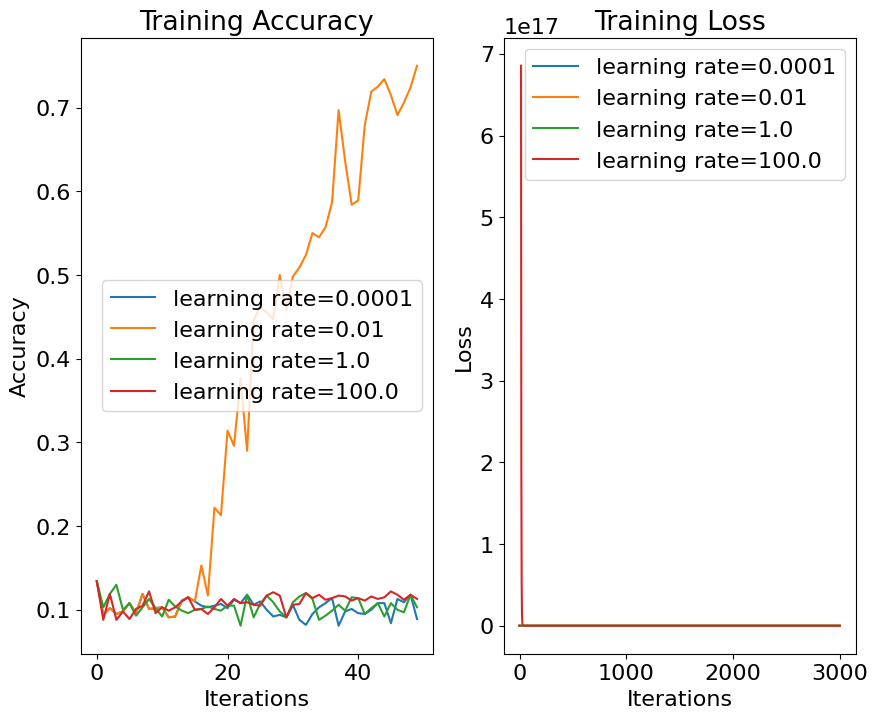

In [ ]:
import numpy as np
from three_layer_net import ThreeLayerNet

hs1 = 128
hs2 = 36
lrs = [1e-4, 1e-2, 1e-0, 1e2]
reg = 0.001

stat_dict = {}
for lr in lrs:
    print('train with lr: {}'.format(lr))
    # 设置随机数种子
    np.random.seed(0)
    net = ThreeLayerNet(input_size, hs1, hs2, num_classes, dtype=X_train.dtype)

    stats = net.train(X_train, y_train,
            num_iters=3000, batch_size=1000,
            learning_rate=lr, learning_rate_decay=0.95,
            reg=reg, verbose=False)

    stat_dict[lr] = stats

# 创建一个宽10英寸、高8英寸的图形窗口
plt.figure(figsize=(10, 8))

# 遍历每个隐藏层大小的统计数据，并绘制训练精度和损失
for lr, stats in stat_dict.items():
    train_acc_history = stats['train_acc_history']  # 提取训练精度历史
    loss_history = stats['loss_history']  # 提取损失历史

    # 生成迭代次数列表
    iterations = list(range(len(train_acc_history)))

    # 绘制训练精度图
    plt.subplot(1, 2, 1)  # 1行2列的第1个
    plt.plot(iterations, train_acc_history, label=f'learning rate={lr}')
    plt.title('Training Accuracy')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')

    # 绘制损失图
    plt.subplot(1, 2, 2)  # 1行2列的第2个
    plt.plot(loss_history, label=f'learning rate={lr}')
    plt.title('Training Loss')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')

# 在第一个图（准确率）上添加图例
plt.subplot(1, 2, 1)
plt.legend()

# 在第二个图（损失）上添加图例
plt.subplot(1, 2, 2)
plt.legend()

# 显示整个图形
plt.show()


train with reg: 0
train with reg: 1e-05
train with reg: 0.001
train with reg: 0.1


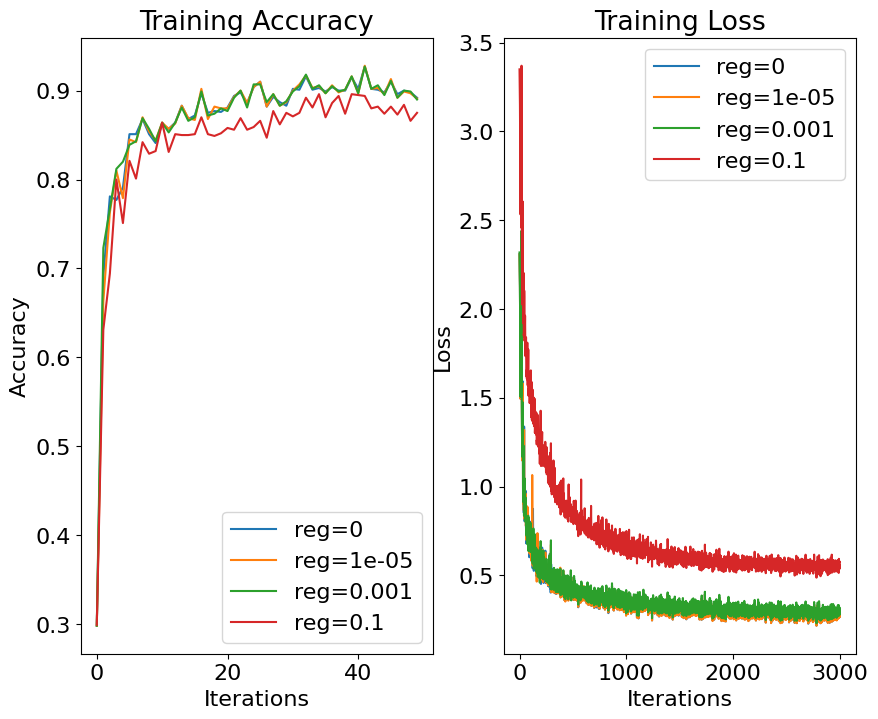

In [ ]:
import numpy as np
from three_layer_net import ThreeLayerNet

hs1 = 128
hs2 = 32
lr = 0.01
regs = [0, 1e-5, 1e-3, 1e-1]
input_size = 784
num_classes = 10

stat_dict = {}
for reg in regs:
    print('train with reg: {}'.format(reg))
    # 设置随机数种子
    np.random.seed(0)
    net = ThreeLayerNet(input_size, hs1, hs2, num_classes, dtype=X_train.dtype)
    stats = net.train(X_train, y_train,
            num_iters=3000, batch_size=1000,
            learning_rate=lr, learning_rate_decay=0.95,
            reg=reg, verbose=False)
    stat_dict[reg] = stats

# 创建一个宽10英寸、高8英寸的图形窗口
plt.figure(figsize=(10, 8))

# 遍历每个隐藏层大小的统计数据，并绘制训练精度和损失
for reg, stats in stat_dict.items():
    train_acc_history = stats['train_acc_history']  # 提取训练精度历史
    loss_history = stats['loss_history']  # 提取损失历史

    # 生成迭代次数列表
    iterations = list(range(len(train_acc_history)))

    # 绘制训练精度图
    plt.subplot(1, 2, 1)  # 1行2列的第1个
    plt.plot(iterations, train_acc_history, label=f'reg={reg}')
    plt.title('Training Accuracy')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')

    # 绘制损失图
    plt.subplot(1, 2, 2)  # 1行2列的第2个
    plt.plot(loss_history, label=f'reg={reg}')
    plt.title('Training Loss')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')

# 在第一个图（准确率）上添加图例
plt.subplot(1, 2, 1)
plt.legend()

# 在第二个图（损失）上添加图例
plt.subplot(1, 2, 2)
plt.legend()

# 显示整个图形
plt.show()




# 训练模型

iteration 0 / 3000: loss 2.336
iteration 100 / 3000: loss 0.758
iteration 200 / 3000: loss 0.509
iteration 300 / 3000: loss 0.460
iteration 400 / 3000: loss 0.393
iteration 500 / 3000: loss 0.424
iteration 600 / 3000: loss 0.439
iteration 700 / 3000: loss 0.366
iteration 800 / 3000: loss 0.383
iteration 900 / 3000: loss 0.386
iteration 1000 / 3000: loss 0.386
iteration 1100 / 3000: loss 0.324
iteration 1200 / 3000: loss 0.350
iteration 1300 / 3000: loss 0.324
iteration 1400 / 3000: loss 0.312
iteration 1500 / 3000: loss 0.331
iteration 1600 / 3000: loss 0.302
iteration 1700 / 3000: loss 0.293
iteration 1800 / 3000: loss 0.303
iteration 1900 / 3000: loss 0.321
iteration 2000 / 3000: loss 0.317
iteration 2100 / 3000: loss 0.290
iteration 2200 / 3000: loss 0.316
iteration 2300 / 3000: loss 0.319
iteration 2400 / 3000: loss 0.283
iteration 2500 / 3000: loss 0.296
iteration 2600 / 3000: loss 0.291
iteration 2700 / 3000: loss 0.305
iteration 2800 / 3000: loss 0.267
iteration 2900 / 3000: los

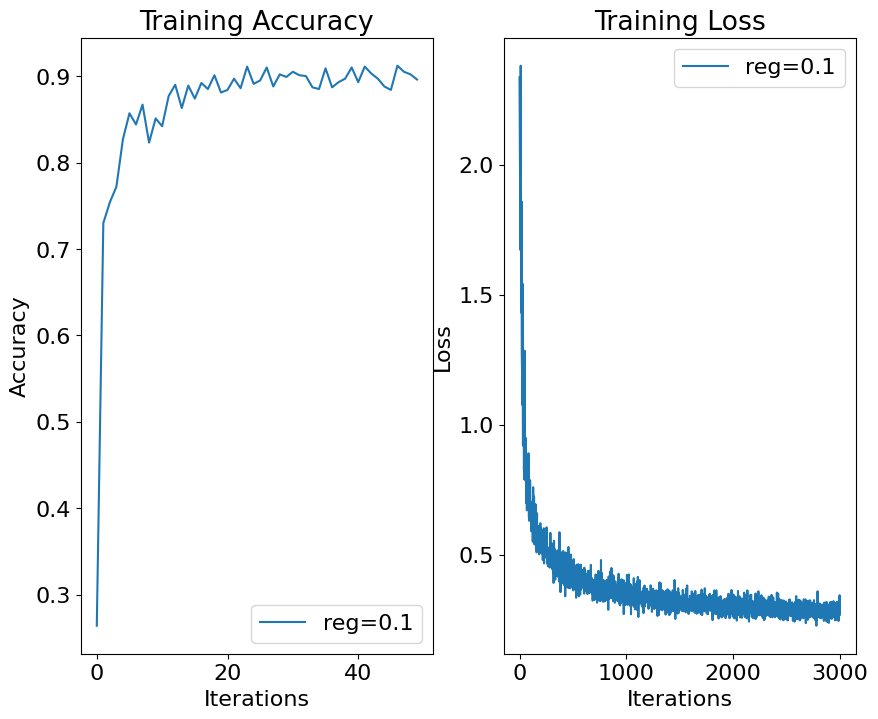

In [26]:
import matplotlib.pyplot as plt
from three_layer_net import ThreeLayerNet
from three_layer_net import nn_forward_pass

input_size = 784
hidden_size1 = 128
hidden_size2 = 36
num_classes = 10


net = ThreeLayerNet(input_size, hidden_size1, hidden_size2, num_classes, dtype=X_train.dtype)
stats = net.train(X_train, y_train,

                  num_iters=3000, batch_size=1000,
                  learning_rate=0.01, learning_rate_decay=0.95,
                  reg=0.001, verbose=True)
# 画图
plt.figure(figsize=(10, 8))

# 遍历每个隐藏层大小的统计数据，并绘制训练精度和损失

train_acc_history = stats['train_acc_history']  # 提取训练精度历史
loss_history = stats['loss_history']  # 提取损失历史

# 生成迭代次数列表
iterations = list(range(len(train_acc_history)))
# 绘制训练精度图
plt.subplot(1, 2, 1)  # 1行2列的第1个
plt.plot(iterations, train_acc_history, label=f'reg={reg}')
plt.title('Training Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')

# 绘制损失图
plt.subplot(1, 2, 2)  # 1行2列的第2个
plt.plot(loss_history, label=f'reg={reg}')
plt.title('Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')

# 在第一个图（准确率）上添加图例
plt.subplot(1, 2, 1)
plt.legend()

# 在第二个图（损失）上添加图例
plt.subplot(1, 2, 2)
plt.legend()

# 显示整个图形
plt.show()


## 权重可视化

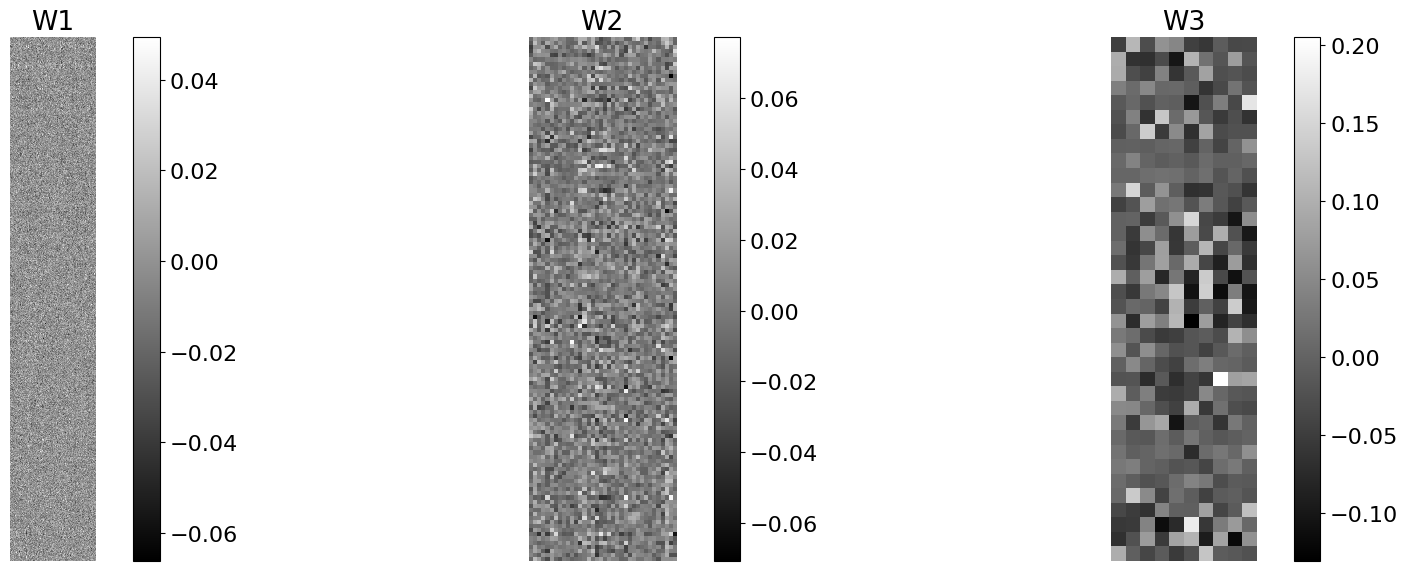

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# 创建一个图和三个子图，调整为一行三列的布局
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 可视化W1
ax = axes[0]
im = ax.imshow(net.params['W1'], cmap='gray')
ax.set_title('W1')
ax.axis('off')  # 关闭坐标轴
fig.colorbar(im, ax=ax)  # 添加颜色条

# 可视化W2
ax = axes[1]
im = ax.imshow(net.params['W2'], cmap='gray')
ax.set_title('W2')
ax.axis('off')
fig.colorbar(im, ax=ax)

# 可视化W3
ax = axes[2]
im = ax.imshow(net.params['W3'], cmap='gray')
ax.set_title('W3')
ax.axis('off')
fig.colorbar(im, ax=ax)

# 显示图像
plt.tight_layout()
plt.show()


# 测试集

In [27]:

# Predict on the validation set
y_train_pred = net.predict(X_train)
train_acc = 100.0 * np.mean(y_train_pred == y_train)
print('Train Validation accuracy: {:.2f}%'.format(train_acc))

y_pred = net.predict(X_test)
y_accurancy = 100* np.mean(y_pred == y_test)
print('Test Validation accuracy: {:.2f}%'.format(y_accurancy))

Train Validation accuracy: 90.16%
Test Validation accuracy: 87.75%
